# About Dataset
Description
Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

> Features:

> Customer Info:
* customerID : Customer ID
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)

> Customer Internet:
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

> Customer Payment /Contract:
* tenure : Number of months the customer has stayed with the company
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer

> Target:
* Churn : Whether the customer churned or not (Yes or No)

Dataset [download](https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv)

# Import Library

In [231]:
# import standar library
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

In [232]:
# loading data menjadi df
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [233]:
# menampilkan dataset teratas
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [234]:
# menunjukan banyaknya kolom dan baris
df.shape

(7043, 21)

In [235]:
#menampilkan nama kolom dari dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [236]:
# menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [237]:
#mengubah string menjadi numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [238]:
# mencari apakah ada nan atau null value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [239]:
# melihat null value false true
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [240]:
# menampilkan deskripsi sederhana dataset numerical
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [241]:
# menampilkan deskripsi sederhana dataset object
obj = df.select_dtypes(include='object')
obj.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5084-OOVCJ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


> Telco Customer dataset menunjukan bahwa:
1. Dataset tersebut diatas memiliki 21 kolom dimana terdapat 7043 baris.
2. Kolom Senior Citizen dan	tenure	bertipe integer sedangkan Monthly Charges bertipe float dan kolom lainnya bertipe object.
3. Kolom Total Charge yang merupakan object sehingga nilai berupa string dimana akan diubah menjadi numerik yang menyebabkan adanya NaN value akibat perubahan type.
4. Selain kolom Total Charge tidak ada kolom yang memiliki NaN value.
5. Kolom Senior Citizen pada deskripsi menunjukan bahwa hanya terdapat dua value dikolom tersebut yaitu 0 dan 1.
6. Kolom object pada descripsi menunjukan bahwa rata rata unique value adalah 2 dan yang memiliki unique value terbanyak adalah kolom payment Method sebanyak 4.
7. Kolom CustomerID menunjukan bahwa value yang ada hanya merupakan identitas atau ID.


# Exploration Data Analysis

In [242]:
#melakukan copy dataset yang ada dengan nama df_new
df_new= df.copy()

In [243]:
#drop kolom CustomerID 
df_new = df_new.drop(columns='customerID')

In [244]:
#melihat dataset setelah dilakukan drop kolom
print(df_new.shape)
df_new.head(3)

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [245]:
# menampilkan unique value dan jumlah pada feature categorical
obj = df_new.select_dtypes(include='object')
for col in obj :
  print(col)
  print(obj [col].value_counts())
  print()

gender
Male      3555
Female    3488
Name: gender, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    152

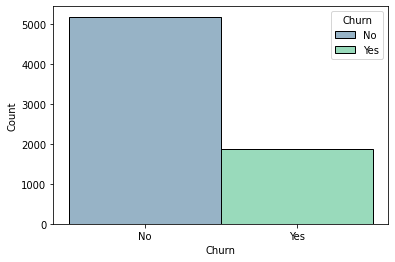

In [246]:
# menampilkan status pelanggan
sns.histplot(data=df_new, x=df_new.Churn,hue=df_new.Churn, palette="viridis" )

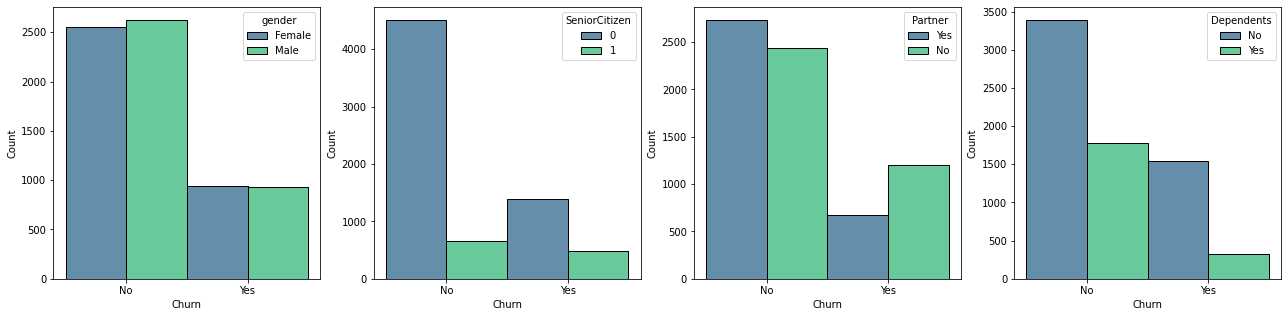

In [247]:
# menampilkan seluruhan kolom customer 
obj = df_new[['gender','SeniorCitizen',	'Partner',	'Dependents']]
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(22,5))

j=0

for col in obj:
    sns.histplot(data=obj[col], x=df_new.Churn, hue=obj[col],multiple="dodge", palette="viridis" ,ax=axes[j])
    j+=1
    if j>3:
      j=0

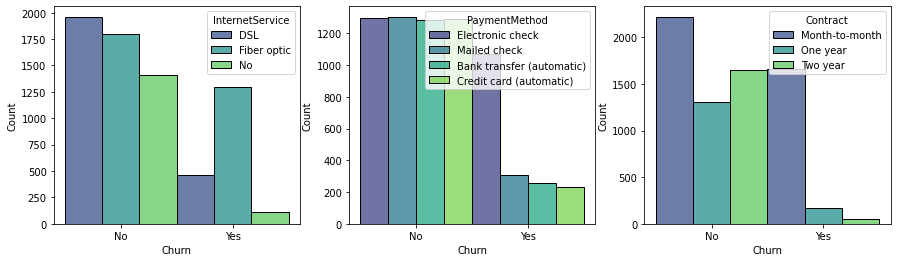

In [248]:
# menampilkan figure 'InternetService','PaymentMethod','Contract' dengan churn no berdasarkan gender
obj = df_new[['InternetService','PaymentMethod','Contract']]
fig,axes=plt.subplots(ncols=3,figsize=(15,4))

j=0

for col in obj:
    sns.histplot(data=obj[col], x=df_new.Churn, hue=obj[col],multiple="dodge", palette="viridis",ax=axes[j])
    j+=1
    if j>2:
      j=0


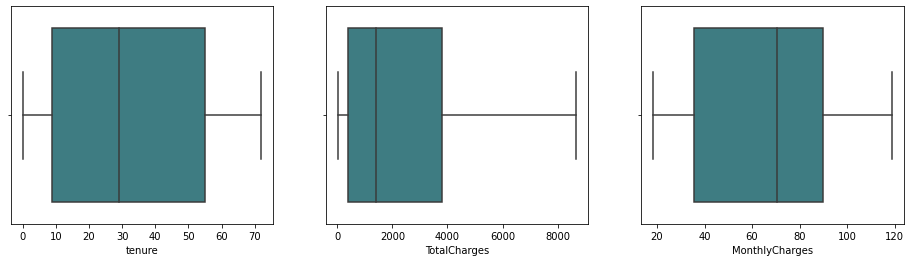

In [249]:
# menampilkan boxplot Total dan Monthly Charge
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(data=df_new, x='tenure', palette="crest")
plt.subplot(132)
sns.boxplot(data=df_new, x='TotalCharges', palette="crest")
plt.subplot(133)
sns.boxplot(data=df_new,x='MonthlyCharges', palette="crest")

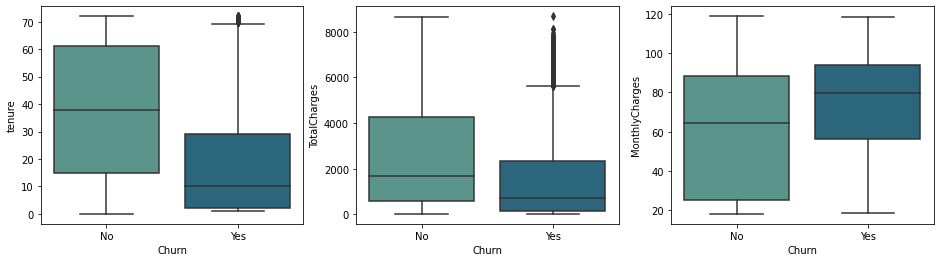

In [250]:
# menampilkan boxplot Total dan Monthly Charge
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(data=df_new, x='Churn',y='tenure', palette="crest")
plt.subplot(132)
sns.boxplot(data=df_new, x='Churn',y='TotalCharges', palette="crest")
plt.subplot(133)
sns.boxplot(data=df_new, x='Churn',y='MonthlyCharges', palette="crest")

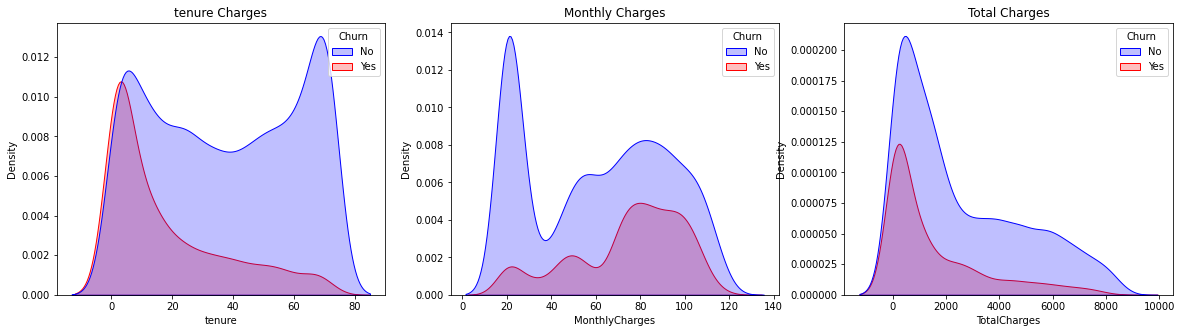

In [251]:
# menampilkan figure tenure, total, dan monthly charge dengan menggunakan churn
plt.figure(figsize=(20,5))

# plot tenure charge
plt.subplot(131)
plt.title("tenure Charges")
sns.kdeplot(data=df_new, x=df_new.tenure, hue="Churn",shade = True,palette ={"No" : "blue", 'Yes' : "red"})

# plot monthly charge
plt.subplot(132)
plt.title("Monthly Charges")
sns.kdeplot(data=df_new, x=df_new.MonthlyCharges, hue="Churn",shade = True,palette ={"No" : "blue", 'Yes' : "red"})

# plot total charge
plt.subplot(133)
plt.title("Total Charges")
sns.kdeplot(data=df_new, x=df_new.TotalCharges, hue="Churn",shade = True,palette ={"No" : "blue", 'Yes' : "red"})

In [252]:
# menampilkan dataset berdasarkan churn no
df_new_no =df_new[df_new.Churn=='No']
print(df_new_no.shape)
df_new_no.head(2)

(5174, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [253]:
# menampilkan dataset berdasarkan churn yes
df_new_yes = df_new[df_new.Churn=='Yes']
print(df_new_yes.shape)
df_new_yes.head(2)

(1869, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


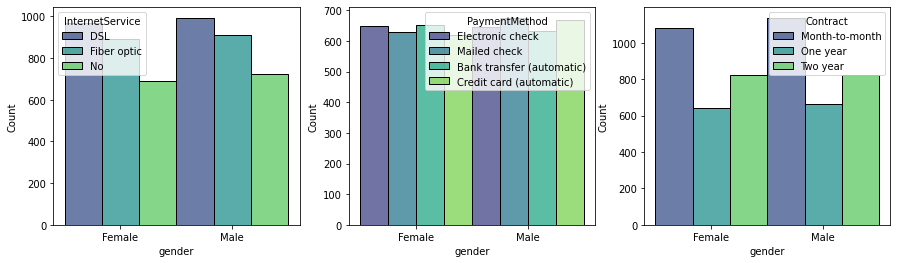

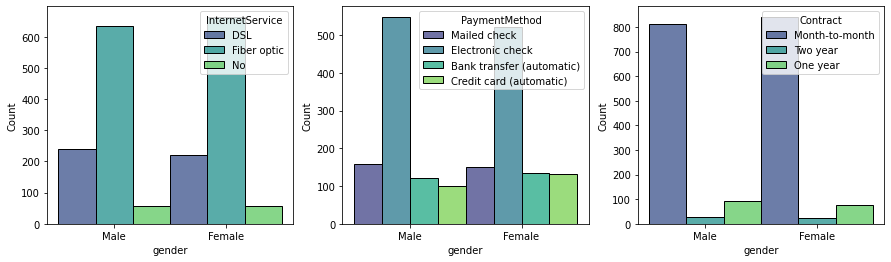

In [254]:
# menampilkan figure 'InternetService','PaymentMethod','Contract' dengan churn no berdasarkan gender
obj_no = df_new_no[['InternetService','PaymentMethod','Contract']]
fig,axes=plt.subplots(ncols=3,figsize=(15,4))

j=0

for col in obj_no:
    sns.histplot(data=obj_no[col], x=df_new_no.gender, hue=obj_no[col],multiple="dodge", palette="viridis",ax=axes[j])
    j+=1
    if j>2:
      j=0

# menampilkan figure 'InternetService','PaymentMethod','Contract' dengan churn yes berdasarkan gender
obj_yes = df_new_yes[['InternetService','PaymentMethod','Contract']]
fig,axes=plt.subplots(ncols=3,figsize=(15,4))
j=0

for col in obj_yes:
    sns.histplot(data=obj_yes[col], x=df_new_yes.gender, hue=obj_yes[col],multiple="dodge", palette="viridis" ,ax=axes[j])
    j+=1
    if j>2:
      j=0

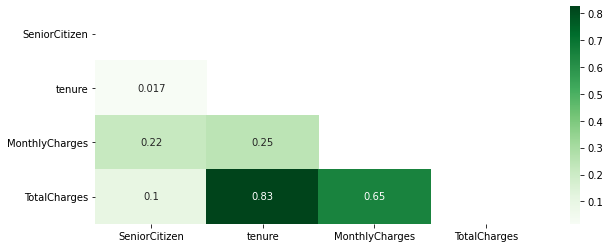

In [255]:
#melihat correlation heatmap untuk kolom numeric 
plt.figure(figsize=(10,4))
sns.heatmap(df_new.corr(), annot=True,cmap="Greens",mask=np.triu(np.ones_like(df_new.corr(), dtype=bool)))

> EDA menunjukan:
1. Drop CustomerID dari dataset yang telah di copy.
2. Terjadi perubahan pada jumlah kolom dari 21 menjadi 20, dan baris tetap tidak berubah.
3. Terdapat value yang sama untuk beberapa kolom kategori diantaranya OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies diantaranya No, Yes, No internet service dan MultipleLines diantaranya No, Yes, No phone service. sedangkan untuk beberapa kolom lain selain yang disebutkan memiliki value lain.
4. Figure boxplot TotalCharges dan Monthly Charges menunjukan bahwa tidak ada outlier.
5. Kdeplot menunjukan bahwa tenure memiliki skewed right pada Yes dan symmetric pada No, untuk Total Charge memiliki skewed right pada Yes dan No, Monthly Charge miemiliki symmetric pada Yes dan bimodal pada No.
6. Pada data grup menurut Churn menunjukan bahwa Churn Yes pada gender Female 939, Male 930 sedangkan Churn No pada gender Female 2549, Male 2625.
7. pada Churn No kita dapat melihat value tertinggi pada feature internet service untuk male female pada DSL, pada payment method untuk male pada Bank Transfer untuk female pada Mailed Check, sedangkan pada Contract male female pada month to month.
8. pada Churn Yes kita dapat melihat value tertinggi pada feature internet service untuk male female pada Fiber Optic, pada payment method untuk male female pada Electronic Check, sedangkan pada Contract male female pada month to month.
9. Heatmap menunjukan adanya korelasi antar feature yang ada mendeketi satu atau korelasi yang kuat.




#Preprocessing

In [256]:
# copy dataset
df_new2=df_new.copy()

In [257]:
#value = df_new2[['InternetService','Contract','PaymentMethod']]
for col in df_new2 :
  print(col)
  print(sorted(df_new2 [col].unique()))


gender
['Female', 'Male']
SeniorCitizen
[0, 1]
Partner
['No', 'Yes']
Dependents
['No', 'Yes']
tenure
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
PhoneService
['No', 'Yes']
MultipleLines
['No', 'No phone service', 'Yes']
InternetService
['DSL', 'Fiber optic', 'No']
OnlineSecurity
['No', 'No internet service', 'Yes']
OnlineBackup
['No', 'No internet service', 'Yes']
DeviceProtection
['No', 'No internet service', 'Yes']
TechSupport
['No', 'No internet service', 'Yes']
StreamingTV
['No', 'No internet service', 'Yes']
StreamingMovies
['No', 'No internet service', 'Yes']
Contract
['Month-to-month', 'One year', 'Two year']
PaperlessBilling
['No', 'Yes']
PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']

In [258]:
# mengganti 'No internet service' dan'No phone service' menjadi 'No'
df_new2.replace('No internet service','No',inplace=True)
df_new2.replace('No phone service','No',inplace=True)

In [259]:
# melihat original feature dan setelah dilakukan dummy
print("Original features:\n", list(df_new2.columns), "\n")
df_dummies = pd.get_dummies(data=df_new2, columns=['InternetService','Contract','PaymentMethod'])
print("Features after get_dummies:\n", list(df_dummies.columns))

Original features:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Features after get_dummies:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [260]:
# mengganti female dan male menjadi 1 dan 0 
df_dummies.gender.replace({'Female':1,'Male':0},inplace=True)

In [261]:
# mengganti Yes dan No menjadi 1 dan 0 
columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in columns:
    df_dummies[col].replace({'Yes': 1,'No': 0},inplace=True)

In [262]:
# mengisi NaN value pada feature total charge dengan menggunakan mean
df_dummies.TotalCharges = df_dummies.TotalCharges.fillna(df_dummies.TotalCharges.mean())

In [263]:
# menampilkan hasil akhir dataset
df_dummies.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1


In [264]:
# melihat apakah masih ada NaN value
df_dummies.isna().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [265]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#melakukan pipeline untuk scaling feature tertentu
minmax = ['tenure','MonthlyCharges','TotalCharges']
df_dummies_minmax= pd.DataFrame(df_dummies, columns=minmax)
df_dummies_remain= df_dummies.drop( columns=minmax)

minmax_transformer = Pipeline([('scaler', MinMaxScaler())])

scaled = minmax_transformer.fit_transform(df_dummies_minmax)

df_dummies_scaled=pd.DataFrame(scaled,columns=minmax,index=df_dummies_remain.index)

df_dummies= pd.concat([df_dummies_remain,df_dummies_scaled], axis=1)

In [266]:
# menampilkan hasil scaling
df_dummies.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0.013889,0.115423,0.001275
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.472222,0.385075,0.215867


In [267]:
# melihat korelasi feature berdasarkan Churn
dumcor= pd.DataFrame([df_dummies.corr()["Churn"].sort_values(ascending=False)])
dumcor

,Churn,Contract_Month-to-month,InternetService_Fiber optic,PaymentMethod_Electronic check,MonthlyCharges,PaperlessBilling,SeniorCitizen,StreamingTV,StreamingMovies,MultipleLines,PhoneService,gender,DeviceProtection,OnlineBackup,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),InternetService_DSL,PaymentMethod_Credit card (automatic),Partner,Dependents,TechSupport,OnlineSecurity,Contract_One year,TotalCharges,InternetService_No,Contract_Two year,tenure
Churn,1.0,0.405103,0.30802,0.301919,0.193356,0.191825,0.150889,0.063228,0.061382,0.040102,0.011942,0.008612,-0.06616,-0.082255,-0.091683,-0.117937,-0.124214,-0.134302,-0.150448,-0.164221,-0.164674,-0.171226,-0.17782,-0.199428,-0.22789,-0.302253,-0.352229


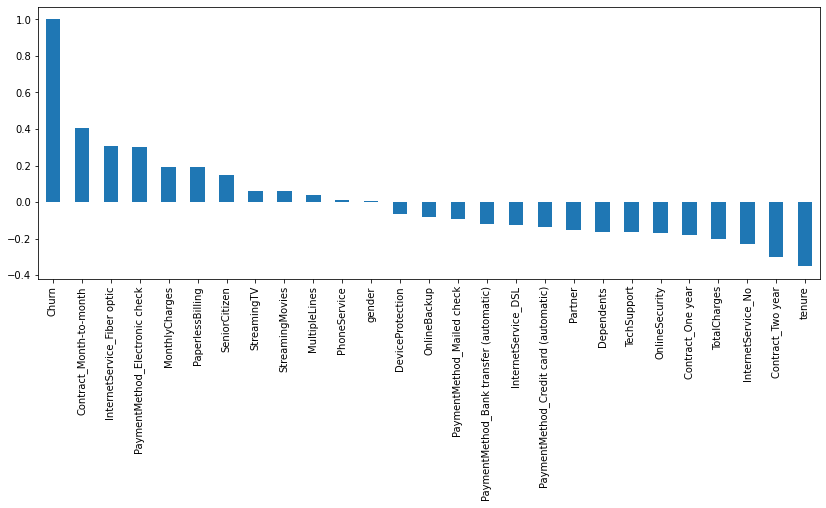

In [268]:
# menampilkan plot korelasi sebelumnya
df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind='bar', figsize=(14,5))

In [269]:
#split dataset menjadi X dan y
X = df_dummies.drop('Churn',axis=1)
y = df_dummies['Churn']

split data

In [270]:
# melakukan split data menjadi train test dan validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify = y,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify = y_train,random_state=42)

In [271]:
print('X')
print('train:',X_train.shape)
print('test:',X_test.shape)
print()
print('y')
print('train:',y_train.shape)
print('test:',y_test.shape)
print()
print('X y')
print('X val:',X_val.shape)
print('y val:',y_val.shape)

X
train: (4507, 26)
test: (1409, 26)

y
train: (4507,)
test: (1409,)

X y
X val: (1127, 26)
y val: (1127,)


#Model and Train

#sequential

In [272]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

In [273]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#Model Sequential

In [303]:
# membuat model sequential 
model1 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [304]:
# menampilkan layer model
model1.layers

In [305]:
# summary model sequential
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 26)                702       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                405       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


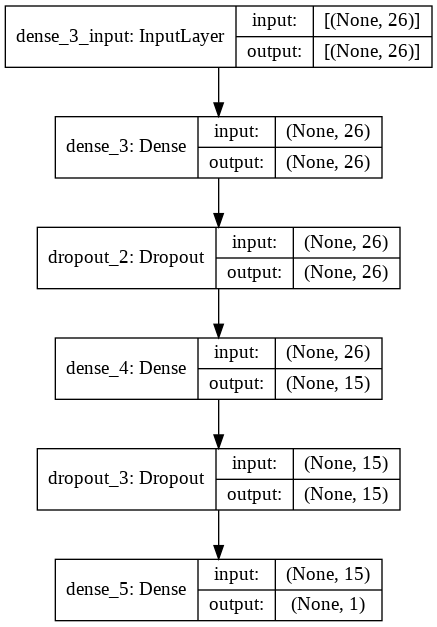

In [306]:
# plot model sequential
keras.utils.plot_model(model1, "model_telco.png", show_shapes=True)

In [307]:
# menampilkan hidden layer
hidden1 = model1.layers[1]
hidden1.name

'dropout_2'

In [308]:
# memastikan hiden layer
model1.get_layer(hidden1.name) is hidden1

True

In [309]:
# melakukan compile model
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [310]:
# melakukan fit train dan validation dengan model
history = model1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5394 - accuracy: 0.7331 - val_loss: 0.4510 - val_accuracy: 0.7977
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7768 - val_loss: 0.4324 - val_accuracy: 0.8030
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7772 - val_loss: 0.4303 - val_accuracy: 0.8057
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7786 - val_loss: 0.4273 - val_accuracy: 0.8075
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7890 - val_loss: 0.4263 - val_accuracy: 0.8092
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7897 - val_loss: 0.4251 - val_accuracy: 0.8137
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7914 - val_loss: 0.4243 - val_accuracy: 0.8057

In [282]:
# menampilkan parameter yang digunakan
history.params

{'epochs': 100, 'steps': 141, 'verbose': 1}

In [283]:
# menampilkan parameter key dan panjang epoch yang digunakan
print(len(history.epoch))
history.history.keys()


100


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

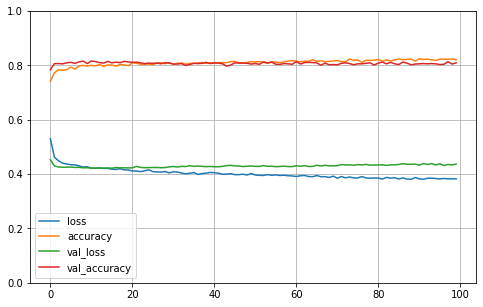

In [284]:
# menampilkan history model sequential
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [311]:
# melakukan evaluasi model dengan validasi
model1.evaluate(X_val, y_val)

36/36 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.7915


[0.4424106478691101, 0.7914817929267883]

#Functional API

In [286]:
  # membuat model functional api
  input_ = keras.layers.Input(shape=26)
  hidden1 = keras.layers.Dense(15, activation="relu")(input_)
  dropout1 = Dropout(0.2)(hidden1)
  hidden2 = keras.layers.Dense(15, activation="relu")(hidden1)
  dropout2 = Dropout(0.2)(hidden2)
  concat = keras.layers.concatenate([input_, hidden2])
  output = keras.layers.Dense(1)(concat)
  model2 = keras.models.Model(inputs=[input_], outputs=[output])

In [287]:
# menampilkan layer model functional
model2.layers

In [288]:
# menampilka summary model functional
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 26)]         0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 15)           405         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 15)           240         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 41)           0           input_1[0][0]                    
                                                                 dense_4[0][0]                

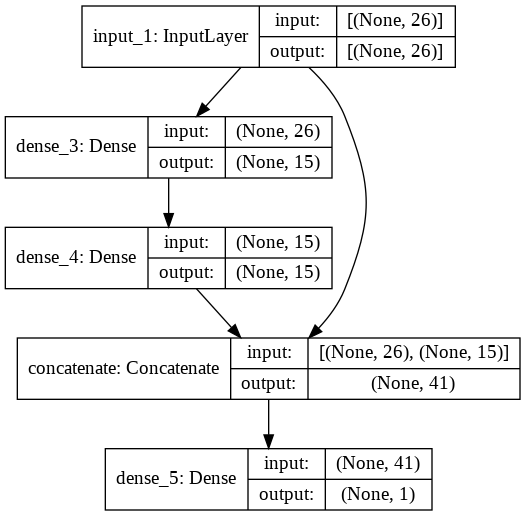

In [289]:
# menampilkan model functional
keras.utils.plot_model(model2, "model_telco2.png", show_shapes=True)

In [290]:
# compile model functional
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [291]:
# melakukan fit train dan validation dengan model functional
history2 = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 1.8299 - accuracy: 0.6501 - val_loss: 1.5872 - val_accuracy: 0.6779
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 1.3069 - accuracy: 0.7007 - val_loss: 1.3007 - val_accuracy: 0.7294
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 1.1400 - accuracy: 0.7160 - val_loss: 1.0598 - val_accuracy: 0.7178
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.7861 - accuracy: 0.7371 - val_loss: 0.8227 - val_accuracy: 0.7542
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.7582 - val_loss: 0.7300 - val_accuracy: 0.7728
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7681 - val_loss: 0.6514 - val_accuracy: 0.7826
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7726 - val_loss: 0.5951 - val_accuracy: 0.7862

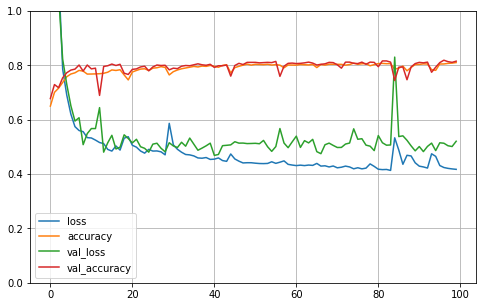

In [292]:
# menampilkan history model sequential
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [293]:
# melakukan evaluasi model dengan validasi
model2.evaluate(X_val,y_val)

36/36 [==============================] - 0s 1ms/step - loss: 0.5208 - accuracy: 0.8154


[0.5207845568656921, 0.8154392242431641]

# GridSearchCV

In [314]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# melakukan gridsearchcv model kerasclassifier

def create_model(activation='relu',optimizer='adam',init_mode = 'normal'):
  model = Sequential()
  model.add(keras.layers.Dense(26, input_dim=(26),kernel_initializer=init_mode, activation=activation))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(15,kernel_initializer=init_mode, activation=activation))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1,kernel_initializer=init_mode, activation='sigmoid'))

 # melakukan penggabungan model 
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  
# model kerasclassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# membuat parameters
init_mode = ['normal', 'glorot_normal']
optimizer = ['Adam', 'Adamax']
activation = ['relu', 'sigmoid']
param_grid = dict(optimizer=optimizer, activation=activation, init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0, callbacks=[es, mc])

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 00001: val_accuracy improved from -inf to 0.73469, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.73469 to 0.73913, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.73913 to 0.79059, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.79059 to 0.79769, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.79769 to 0.80390, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.80390 to 0.80834, saving model to best_model.h5

Epoch 00007: val_accuracy did not improve from 0.80834

Epoch 00008: val_accuracy improved from 0.80834 to 0.81100, saving model to best_model.h5

Epoch 00009: val_accuracy did not improve from 0.81100

Epoch 00010: val_accuracy did not improve from 0.81100

Epoch 00011: val_accuracy did not improve from 0.81100

Epoch 00012: val_accuracy did not improve from 0.81100

Epoch 00013: val_accuracy did not improve from 0.81100

Epoch 00014: val_accuracy did

In [315]:
print("Best params:\n{}\n".format(grid_result.best_params_))

Best params:
{'activation': 'relu', 'init_mode': 'glorot_normal', 'optimizer': 'Adamax'}



In [316]:
# load save model
saved_model = keras.models.load_model('best_model.h5')
# evaluate model
train_acc = saved_model.evaluate(X_train, y_train)
test_acc = saved_model.evaluate(X_val, y_val)
print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))

36/36 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8146
Train: 0.809, Test: 0.815


In [317]:
# model summary
saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                702       
_________________________________________________________________
dropout (Dropout)            (None, 26)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                405       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [319]:
# melakukan fit dengan saved model
history = saved_model.fit(X_train, y_train, epochs=100,validation_data=(X_val, y_val),verbose=0, callbacks=[es])

Epoch 00071: early stopping


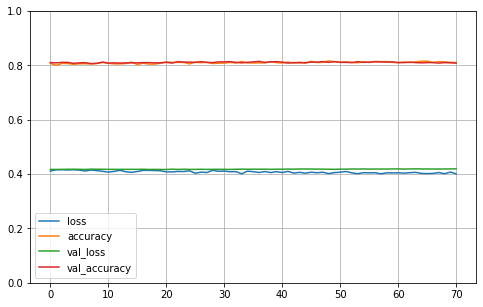

In [332]:
# menampilkan history model sequential improvement
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

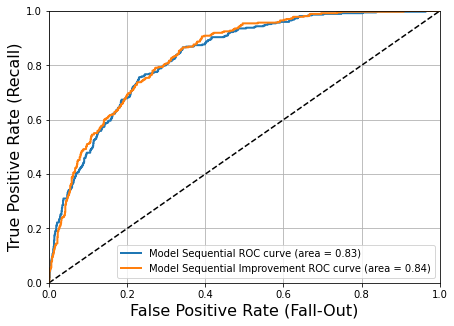

In [333]:
# plot roc auc sequential before after
from sklearn.metrics import roc_curve,auc 

plt.figure(figsize=(7, 5))
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.plot([0, 1], [0, 1], 'k--')
labels=['Model Sequential','Model Sequential Improvement']
for idx, modelt in enumerate([model1,saved_model]):
  y_scores = modelt.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

In [326]:
# model prediction
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)
y_pred1 = [1 if x == True else 0 for x in y_pred1]

y_pred = saved_model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = [1 if x == True else 0 for x in y_pred]

In [327]:
# menampilkan prediksi 10 teratas 
y_pred1[:10]
y_pred[:10]

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



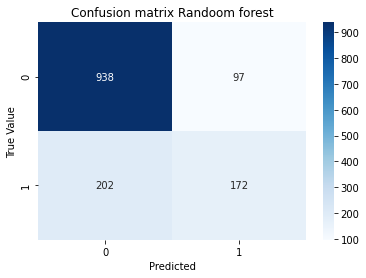

________________________________________________________________

Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



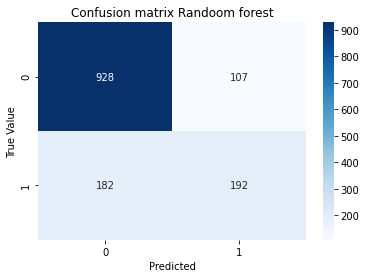

In [329]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# menampilkan classification report dan confussion matrix
print("Classification Report:\n\n", classification_report(y_test, y_pred1))

cm=confusion_matrix(y_test, y_pred1)

sns.heatmap(cm, annot=True,fmt='g',cmap="Blues")
plt.title('Confusion matrix Randoom forest')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()
print('________________________________________________________________\n')
print("Classification Report:\n\n", classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,fmt='g',cmap="Blues")
plt.title('Confusion matrix Randoom forest')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Model Inference

In [334]:
# membuat dictionary data untuk percobaan model
data = {'gender':1, 'SeniorCitizen':1, 'Partner':1, 'Dependents':1, 'tenure':3,
                     'PhoneService':1, 'MultipleLines':0, 'OnlineSecurity':1, 'OnlineBackup':1,
                     'DeviceProtection':1, 'TechSupport':1, 'StreamingTV':0, 'StreamingMovies':1,
                     'PaperlessBilling':0, 'MonthlyCharges':33, 'TotalCharges':10,'InternetService_DSL':0, 'InternetService_Fiber optic':1,
                     'InternetService_No':0, 'Contract_Month-to-month':0, 'Contract_One year':0,
                     'Contract_Two year':1, 'PaymentMethod_Bank transfer (automatic)':1,
                     'PaymentMethod_Credit card (automatic)':0,'PaymentMethod_Electronic check':0, 'PaymentMethod_Mailed check':0} 

In [335]:
# membuat dictionary menjadi dataframe
df0 = pd.DataFrame([data])  
df0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,1,1,3,1,0,1,1,1,1,0,1,0,33,10,0,1,0,0,0,1,1,0,0,0


In [336]:
# loading model yang telah di save
model_try=keras.models.load_model("best_model.h5")

In [337]:
# menampilkan summary model yang telah diloading
model_try.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                702       
_________________________________________________________________
dropout (Dropout)            (None, 26)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                405       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [338]:
# menyiapkan prediksi
y_pred = model_try.predict(df0)
y_pred = (y_pred > 0.5)
y_pred = [1 if x == True else 0 for x in y_pred]

In [339]:
# prediksi data baru
y_pred 

[1]

> EDA Analysis :
1. Tenure, Monthly dan Total Charge menunjukan tidak adanya oulier.
2. Tenure menunjukan lebih banyak no dibandingkan dnegan yes berdasarkan churn dapat dilihat pada median yan mendekati 40, Total Charge pun demikian memiliki median yang tinggi pada churn no dibandingkan dengan churn yes sedangkadan Monthly Charge dengan churn yes memiliki nilai median yang tinggi sehingga kecenderungan churn yes berdasarkan monthly charge itu tinggi
3. Kdeplot menunjukan bahwa tenure memiliki skewed right pada Yes dan symmetric pada No, untuk Total Charge memiliki skewed right pada Yes dan No, Monthly Charge miemiliki symmetric pada Yes dan bimodal pada No.
4. pada Churn No kita dapat melihat value tertinggi pada feature internet service untuk male female pada DSL, pada payment method untuk male pada Bank Transfer untuk female pada Mailed Check, sedangkan pada Contract male female pada month to month.
5. pada Churn Yes kita dapat melihat value tertinggi pada feature internet service untuk male female pada Fiber Optic, pada payment method untuk male female pada Electronic Check, sedangkan pada Contract male female pada month to month.
6. Heatmap numerikal menunjukan adanya tinggi total dan monthly charge dengan churn sedangkan bila dilakungan dummy data maka korelasi yang kuat terhadap churn adalah jenis contract month to month, internet service dengan fiber optic, dan payment mehtod menggunakan electronic check.





Model Analysis:
1. Moden sequential dengan epoch 100 dan 1 layer menunjukan nilai loss: 0.4367 dan accuracy: 0.8092 yang merupakan hasil dari validasi.
2. Model Functional API dengan epoch 100 dan 1 layer menunjukan nilai loss: 0.6228 dan accuracy: 0.7719 yang merupakan hasil dari validasi.
3. Model Functional API dengan epoch 100 dan 1 layer menunjukan nilai loss: 0.4177 dan accuracy: 0.8208 yang merupakan hasil dari validasi.
4. hasil gridsearchcv menunjukan bahwa best parameter yang dapat digunakan dalam model adalah Best params: 'activation': 'relu', 'init_mode': 'glorot_normal', 'optimizer': 'Adam'
5. confussion matrix menunjukan:

> TP = pelanggan tidak Churn dan diprediksi tidak Churn.

> TN = pelanggan Churn dan diprediksi Churn.

> FP = pelanggan Churn dan diprediksi tidak Churn.

> FN = pelanggan tidak Churn dan diprediksi Churn.